## Feature Transform

In [34]:
import pandas as pd
df=pd.read_csv("Data_to_Transform.csv")
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [35]:
df.skew()

Moderate Positive Skew    0.656308
Highly Positive Skew      1.271249
Moderate Negative Skew   -0.690244
Highly Negative Skew     -1.201891
dtype: float64

In [36]:
import numpy as np
from scipy import stats

In [37]:
np.log(df["Highly Positive Skew"])

0       1.063011
1       1.085995
2       1.087342
3       1.098720
4       1.102640
          ...   
9995    2.790522
9996    2.797053
9997    2.839253
9998    2.869515
9999    2.893275
Name: Highly Positive Skew, Length: 10000, dtype: float64

In [38]:
np.reciprocal(df["Moderate Positive Skew"])

0       1.111123
1       0.898026
2       0.864431
3       0.791057
4       0.755336
          ...   
9995    0.067801
9996    0.067320
9997    0.065522
9998    0.065488
9999    0.061711
Name: Moderate Positive Skew, Length: 10000, dtype: float64

In [39]:
df["Highly Positive Skew_boxcox"],parameters=stats.boxcox(df["Highly Positive Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox
0,0.899990,2.895074,11.180748,9.027485,0.812909
1,1.113554,2.962385,10.842938,9.009762,0.825921
2,1.156830,2.966378,10.817934,9.006134,0.826679
3,1.264131,3.000324,10.764570,9.000125,0.833058
4,1.323914,3.012109,10.753117,8.981296,0.835247
...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357


In [40]:
df.skew()

Moderate Positive Skew         0.656308
Highly Positive Skew           1.271249
Moderate Negative Skew        -0.690244
Highly Negative Skew          -1.201891
Highly Positive Skew_boxcox    0.023089
dtype: float64

In [41]:
df["Highly Negative Skew_yeolhon"],parameters=stats.yeojohnson(df["Highly Negative Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox,Highly Negative Skew_yeolhon
0,0.899990,2.895074,11.180748,9.027485,0.812909,51.081487
1,1.113554,2.962385,10.842938,9.009762,0.825921,50.898041
2,1.156830,2.966378,10.817934,9.006134,0.826679,50.860530
3,1.264131,3.000324,10.764570,9.000125,0.833058,50.798432
4,1.323914,3.012109,10.753117,8.981296,0.835247,50.604084
...,...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701,-1.433326
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189,-1.545673
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681,-1.722267
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357,-1.872430


In [42]:
df.skew()

Moderate Positive Skew          0.656308
Highly Positive Skew            1.271249
Moderate Negative Skew         -0.690244
Highly Negative Skew           -1.201891
Highly Positive Skew_boxcox     0.023089
Highly Negative Skew_yeolhon   -0.274676
dtype: float64

In [43]:
from sklearn.preprocessing import QuantileTransformer

In [46]:
qt=QuantileTransformer(output_distribution="normal")
df["Moderate Negative Skew_1"]=qt.fit_transform(df[["Moderate Negative Skew"]])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox,Highly Negative Skew_yeolhon,Moderate Negative Skew_1
0,0.899990,2.895074,11.180748,9.027485,0.812909,51.081487,5.199338
1,1.113554,2.962385,10.842938,9.009762,0.825921,50.898041,3.227288
2,1.156830,2.966378,10.817934,9.006134,0.826679,50.860530,3.206801
3,1.264131,3.000324,10.764570,9.000125,0.833058,50.798432,3.167111
4,1.323914,3.012109,10.753117,8.981296,0.835247,50.604084,3.159208
...,...,...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701,-1.433326,-3.147619
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189,-1.545673,-3.162489
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681,-1.722267,-3.198205
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357,-1.872430,-3.350199


In [47]:
import matplotlib.pyplot as plt

In [48]:
import seaborn as sns

In [49]:
import statsmodels.api as sm

In [50]:
from scipy import stats

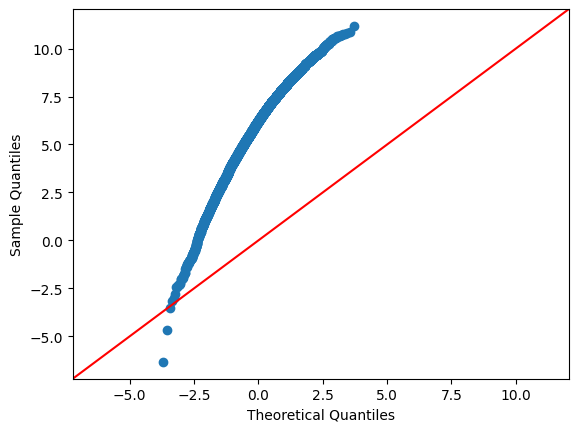

In [52]:
sm.qqplot(df["Moderate Negative Skew"],line="45")
plt.show()

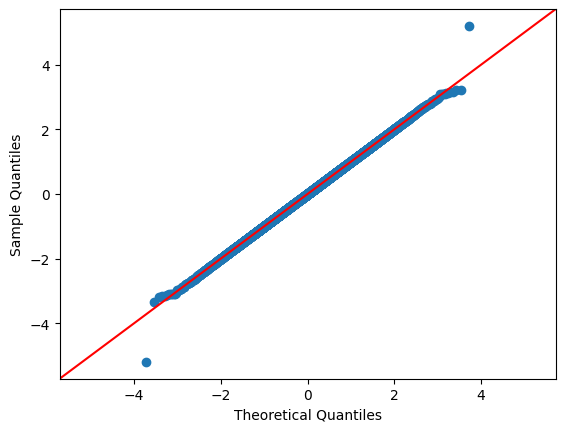

In [56]:
sm.qqplot(df["Moderate Negative Skew_1"],line="45")
plt.show()